In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [64]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\PC\AppData\Local\Temp\ipykernel_4740\1558214831.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(iris_data[col], ax=axes[i], shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_4740\1558214831.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(iris_data[col], ax=axes[i], shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_4740\1558214831.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(iris_data[col], ax=axes[i], shade=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_4740\1558214831.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seabo

AttributeError: module 'matplotlib.pyplot' has no attribute 'adjust_subplots'

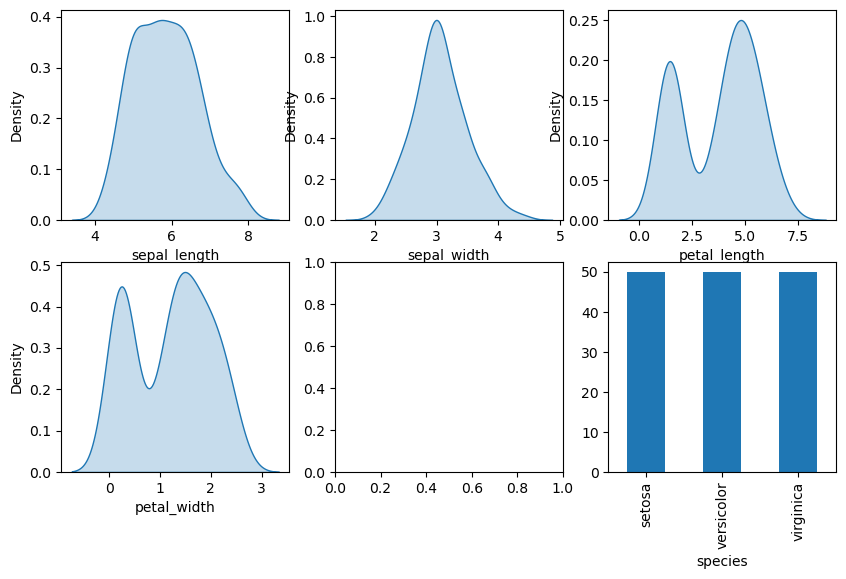

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()
for i, col in enumerate(iris_data.columns):
    if iris_data[col].dtype == 'object':
        iris_data[col].value_counts().plot(kind='bar')
    else:
        sns.kdeplot(iris_data[col], ax=axes[i], shade=True)
    
plt.adjust_subplots(wspace=0.4, hspace=0.4)
plt.show()

In [16]:
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

In [17]:
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Implementing K-Means Clustering

In [18]:
kmeans = KMeans(n_clusters=5)

In [21]:
clusters = kmeans.fit_predict(X)
labels = kmeans.labels_

C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


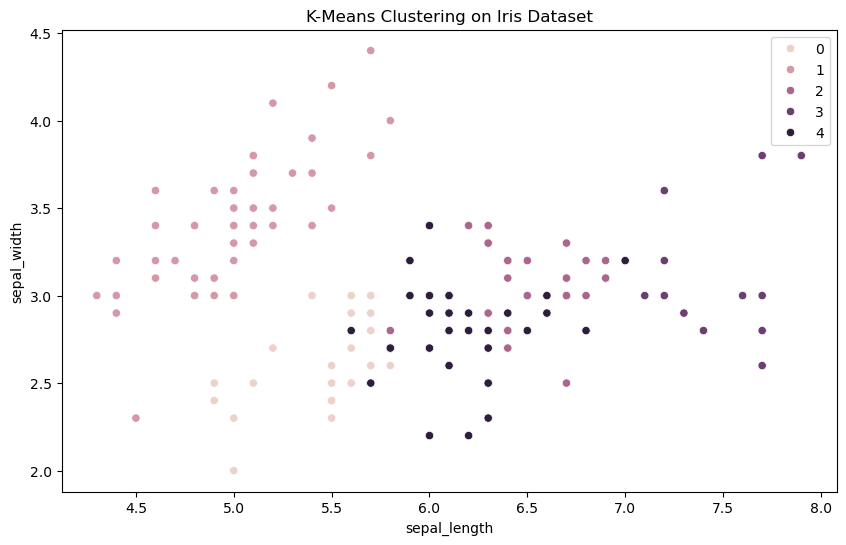

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels)
plt.title('K-Means Clustering on Iris Dataset')

plt.show()

In [29]:
ari = adjusted_rand_score(y, labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.6154838709677419


# Choosing the Optimal Number of Clusters

In [32]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\Documents\100_days_of_bytewise\Day

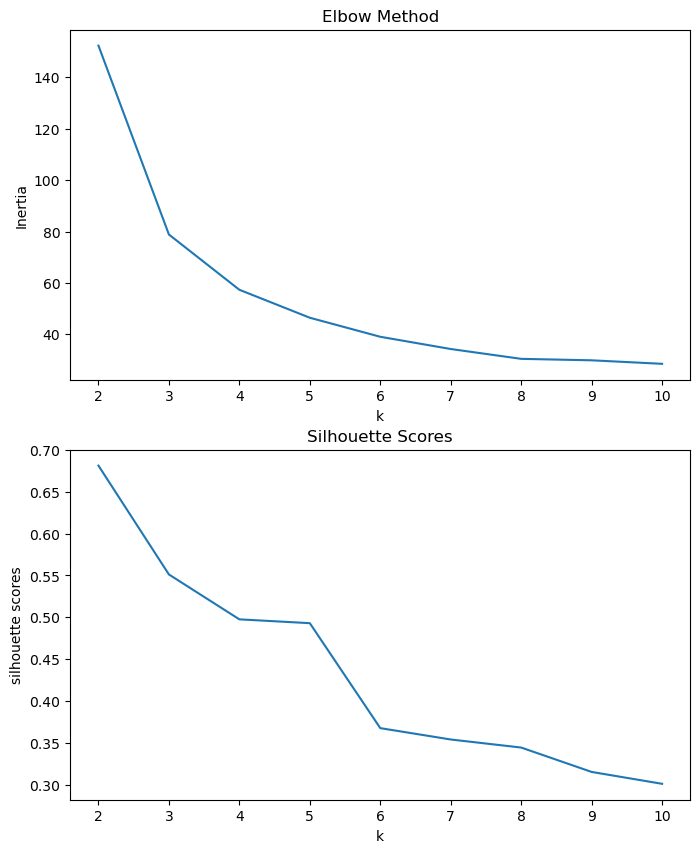

In [46]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
axes = axes.flatten()
axes[0].plot(k_range, inertias)
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Inertia')
axes[1].plot(k_range, silhouette_scores)
axes[1].set_title('Silhouette Scores')
axes[1].set_xlabel('k')
axes[1].set_ylabel('silhouette scores')

plt.show()

# Cluster Visualization with PCA

In [49]:
pca = PCA()
kmeans = KMeans(n_clusters=3)
X_pca = pca.fit_transform(X)
pca_clusters = kmeans.fit_predict(X_pca)
pca_labels = kmeans.labels_

C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


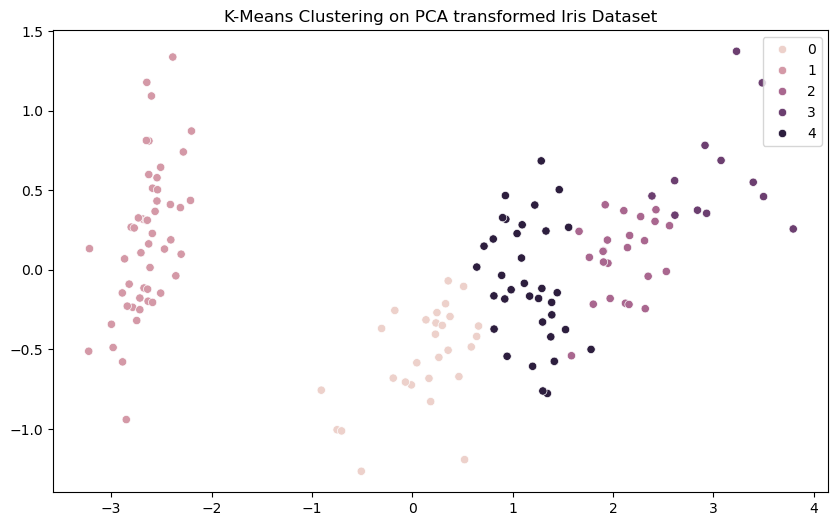

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels)
plt.title('K-Means Clustering on PCA transformed Iris Dataset')

plt.show()

# Hierarchical Clustering: Dendrogram

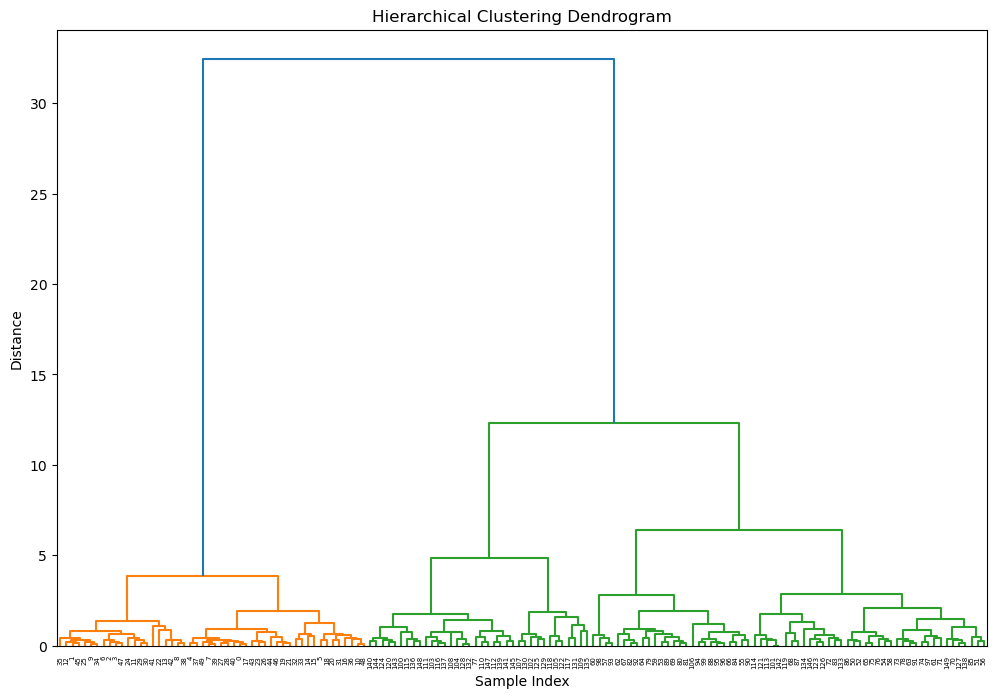

In [55]:

linkage_matrix = linkage(X, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Comparing Clustering Algorithms

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

kmeans_ari = adjusted_rand_score(y, kmeans_labels)
hierarchical_ari = adjusted_rand_score(y, hierarchical_labels)

print(f"K-Means Adjusted Rand Index: {kmeans_ari}")
print(f"Hierarchical Clustering Adjusted Rand Index: {hierarchical_ari}")



C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means Adjusted Rand Index: 0.7163421126838476
Hierarchical Clustering Adjusted Rand Index: 0.7311985567707746


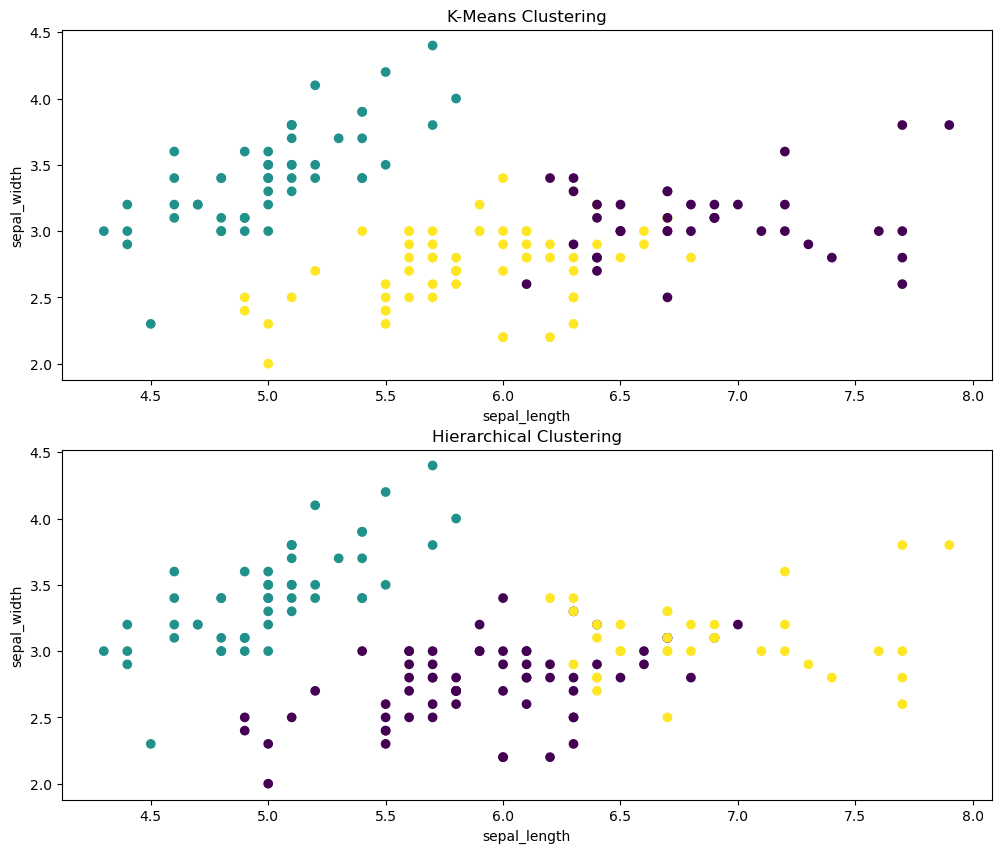

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
axes = axes.flatten()
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel(iris_data.columns[0])
axes[0].set_ylabel(iris_data.columns[1])

axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=hierarchical_labels)
axes[1].set_title('Hierarchical Clustering')
axes[1].set_xlabel(iris_data.columns[0])
axes[1].set_ylabel(iris_data.columns[1])

plt.show()